# NTT Data Hackathon 2022 (AI in Healthcare)[&#129109;](https://www.techgig.com/codegladiators/NTTDATA 'Link to Hackathon page')
----------------------------------------
## Participant: Atrij Talgery(team ATR21)
### Notebook 1: Model training with cardiovascular data to predict heart disease incidence
#### Dataset attribution: 
> **Data source:** <https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset>    
  **License:** Unknown
  
This notebook is part of the solution for the hackathon theme: Early Disease Detection. In this notebook, we train a machine learning model (with cardiovascular incidence data) to predict possibility of a disease condition based on certain health parameters such as: systolic and diastolic blood pressure, weight, height, etc. The model trained via this notebook is meant to be deployed as part of an application.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the Dataset

In [2]:
cvdf = pd.read_csv('./Data/cardio_train.csv',sep = ';')

Get the shape of the Dataset

In [3]:
cvdf.shape

(70000, 13)

Something about dataset, the datatypes, count etc.

In [4]:
#Information of column name, null type, count and Data Type
cvdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


4 point summary of nominal/categorical variables

In [5]:
#Categorical variables can be grouped into categories. The features having the datatype as
#'object' gives us the 4 point summary of all the categorical variables.
cvdf.describe(include='int64')

,id,age,gender,height,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
cvdf.isnull().sum()  #Check for missing values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
cvdf['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

Let us visually examine the relative count of category values for some categories.

/home/projects/Desktop/projhome/miniconda3/envs/base_ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/projects/Desktop/projhome/miniconda3/envs/base_ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/projects/Desktop/projhome/miniconda3/envs/base_ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/projects/Desktop/projhome/miniconda3/envs/base_ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1

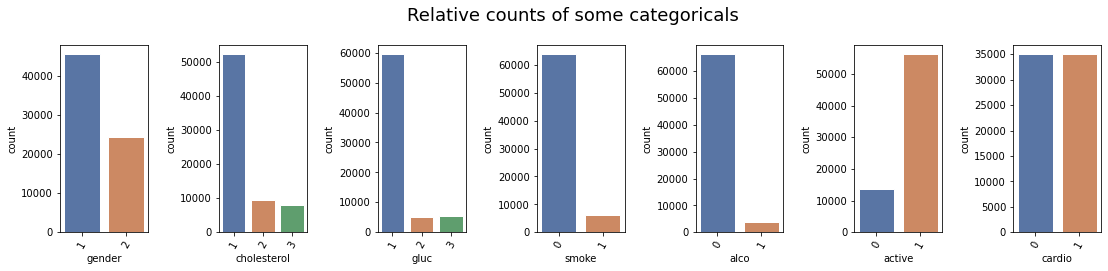

In [8]:
#Draw the subplots using the plt.subplots function with 1 row and 5 columns and figure size of
#(16,4)
fig,axes = plt.subplots(1,7,figsize=(16,4))
#axes.flatten helps us to remove the heirarchical structure of the grid and puts the individual
#plots in a single one-dimensional array.
axes_flat = axes.flatten()

#Fit the subplots in a tight layout with height as 10, width as 4 and pad as 4. tight_layout()
#ensures all subplots fit without overlapping each other.
fig.tight_layout(h_pad=10, w_pad=4, pad=4)
#Assign the super title which comes above all the subplot graphs.
fig.suptitle("Relative counts of some categoricals", fontsize=18)
#Remove trailing blank axes from the figure. Set the style of the graph as whitegrid.
sns.set(style = 'whitegrid')
#Plot the graphs using the seaborn countplot. The features lying on the X-axis are specified in
#the enumerate function.
for ax_idx, feat in enumerate(['gender','cholesterol','gluc',
                              'smoke','alco','active','cardio']):
    sns.countplot(x=cvdf[feat], ax=axes_flat[ax_idx])
    #Print all the x-labels with rotation of 60 degrees.
    axes_flat[ax_idx].tick_params(axis='x',labelrotation=60)

In [9]:
cvdf['id'].value_counts()

id
0        1
66623    1
66631    1
66630    1
66628    1
        ..
33338    1
33339    1
33340    1
33341    1
99999    1
Name: count, Length: 70000, dtype: int64

### 5 point summary of Discrete/Numeric Variable

**Some of these such as MSSubClass should be categorical although they are encoded as numeric. We will look at all such cases later.**

In [10]:
cvdf.describe(include=['int64'])

,id,age,gender,height,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
'''
#Plot the subplots of the Distribution of Discrete/Numeric Variables
fig, axes = plt.subplots(1,5,figsize=(18,4))
axes_flat = axes.flatten()
fig.tight_layout(h_pad = 6, w_pad = 4, pad = 4)
fig.suptitle("Distribution of some Discrete/Numeric Variables", fontsize=18)

for ax_idx, feat in enumerate(['age','height','weight','ap_hi','ap_lo']):
    sns.histplot(data=cvdf, x=feat, element='bars', kde=True, ax=axes_flat[ax_idx])
    axes_flat[ax_idx].tick_params(axis='x',labelrotation=60)
''';

We have information about the following:

 - Hypertensive crisis above 180/120
 - Hypotensive crisis below 90/60

In [12]:
cvdf[(cvdf['ap_hi']>180)|(cvdf['ap_hi']<90)].shape

(690, 13)

In [13]:
cvdf[(cvdf['ap_lo']>120)|(cvdf['ap_lo']<60)].shape

(1231, 13)

In [14]:
cvdf[(cvdf['ap_hi']>180)|(cvdf['ap_hi']<90)]['cardio'].value_counts()

cardio
1    437
0    253
Name: count, dtype: int64

In [15]:
cvdf[(cvdf['ap_lo']>120)|(cvdf['ap_lo']<60)]['cardio'].value_counts()

cardio
1    962
0    269
Name: count, dtype: int64

From the above, we see that there are quite a few data points outside the 'pathological extremes'. Besides, some of  these observations even have the target variable as 0(i.e., no heart disease). This is clearly wrong.

Since we have 70000 datapoints to start with and our goal is to train our model with minimally noisy data, it appears reasonable to drop these rows.

In [16]:
#Drop all systolic values outside pathological extremes.
cvdf_clean = cvdf[(cvdf['ap_hi']<=180)&(cvdf['ap_hi']>=90)]

In [17]:
cvdf_clean.shape

(69310, 13)

In [18]:
#Drop all diastolic values outside pathological extremes.
cvdf_clean = cvdf_clean[(cvdf_clean['ap_lo']<=120)&(cvdf_clean['ap_lo']>=60)]

In [19]:
cvdf_clean.shape

(68205, 13)

Now, let us plot the numeric values again.

/home/projects/Desktop/projhome/miniconda3/envs/base_ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/projects/Desktop/projhome/miniconda3/envs/base_ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/projects/Desktop/projhome/miniconda3/envs/base_ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/projects/Desktop/projhome/miniconda3/envs/base_ds/lib/python3.11/site-packages/seaborn/_ol

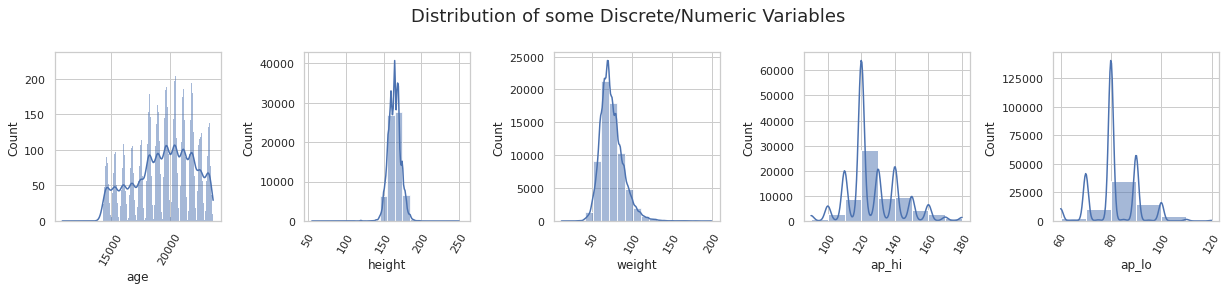

In [20]:
#Plot the subplots of the Distribution of Discrete/Numeric Variables
fig, axes = plt.subplots(1,5,figsize=(18,4))
axes_flat = axes.flatten()
fig.tight_layout(h_pad = 6, w_pad = 4, pad = 4)
fig.suptitle("Distribution of some Discrete/Numeric Variables", fontsize=18)

for ax_idx, feat in enumerate(['age','height','weight','ap_hi','ap_lo']):
    sns.histplot(data=cvdf_clean, x=feat, element='bars', kde=True, binwidth = 10, ax=axes_flat[ax_idx])
    axes_flat[ax_idx].tick_params(axis='x',labelrotation=60)

In [21]:
cvdf_clean[['age','height','weight','ap_hi','ap_lo']].describe()

,age,height,weight,ap_hi,ap_lo
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,19462.667737,164.372861,74.100688,126.434924,81.263925
std,2468.381854,8.176756,14.288862,15.961685,9.143985
min,10798.000000,55.000000,11.000000,90.000000,60.000000
25%,17656.000000,159.000000,65.000000,120.000000,80.000000
50%,19700.000000,165.000000,72.000000,120.000000,80.000000
75%,21323.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,180.000000,120.000000


In [22]:
#The categorical values are already Ordinal or Binary Encoded as appropriate. So, we can easily fit a random forest
#classifier without much ado.
#1. Separate cvdf_clean into x and y.
#2. Do a train_test_split to get x_train, x_test, y_train, y_test.
#3. Create random-forest classifier.
#4. Train using x_train and y_train.
#5. Predict on x_test.
#6. Evaluate the following: confusion_matrix, roc curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [23]:
import pandas as pd

In [24]:
cvdf_clean

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [25]:
#Using the wisdom from analysis(feature importances), we have done later in this notebook, the six important
#features are: age, height, weight, ap_hi, ap_lo, cholesterol. We will use only these features to train our
#classifier.
X = cvdf_clean[['age','height','weight','ap_hi','ap_lo','cholesterol']]
#X = cvdf.iloc[:,1:-1] #Skip the metadata column and the last target column.
y = cvdf_clean.iloc[:,-1:]
X.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,19462.667737,164.372861,74.100688,126.434924,81.263925,1.363243
std,2468.381854,8.176756,14.288862,15.961685,9.143985,0.678080
min,10798.000000,55.000000,11.000000,90.000000,60.000000,1.000000
25%,17656.000000,159.000000,65.000000,120.000000,80.000000,1.000000
50%,19700.000000,165.000000,72.000000,120.000000,80.000000,1.000000
75%,21323.000000,170.000000,82.000000,140.000000,90.000000,1.000000
max,23713.000000,250.000000,200.000000,180.000000,120.000000,3.000000


In [26]:
y.describe()

,cardio
count,68205.000000
mean,0.493688
std,0.499964
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [27]:
#Split our data into training and test set
#We stratify based on EDA of the data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)
X_train

,age,height,weight,ap_hi,ap_lo,cholesterol
4611,21776,155,65.0,150,90,2
31816,19885,158,60.0,120,60,3
29382,18324,157,64.0,130,70,1
24413,21094,180,92.0,110,70,1
27631,20344,171,87.0,120,80,3
...,...,...,...,...,...,...
50399,18039,189,88.0,130,90,3
21162,20377,168,68.0,140,80,2
22012,20465,160,60.0,120,80,1
51377,21754,168,72.0,140,90,1


### Grid search CV to get the best parameters for Random Forest   
Activate if necessary

----------------
**Create the classifier** based on hyperparameter values obtained from gridsearch. We do not see any significant improvement in accuracy across our hyperparameter sweep.

-----------------

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion = 'entropy', n_estimators = 200, min_samples_leaf = 1, min_samples_split = 150)

#Training the model on the training set.
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(criterion='entropy', min_samples_split=150,
                       n_estimators=200)

In [29]:
X_train.head()  #Note the sequence of features to give to the model.
#It is height, weight, ap_hi, ap_lo, cholesterol

,age,height,weight,ap_hi,ap_lo,cholesterol
4611,21776,155,65.0,150,90,2
31816,19885,158,60.0,120,60,3
29382,18324,157,64.0,130,70,1
24413,21094,180,92.0,110,70,1
27631,20344,171,87.0,120,80,3


In [30]:
#Now we have trained the model, we are now going to serialize and pickle it.
import pickle
pickle.dump(clf,open("cardio_model_rf.pkl","wb"))
#You can activate and deactivate this cell as and when needed.

/home/projects/Desktop/projhome/miniconda3/envs/base_ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/projects/Desktop/projhome/miniconda3/envs/base_ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/projects/Desktop/projhome/miniconda3/envs/base_ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


ap_hi          0.411711
age            0.197021
ap_lo          0.179884
cholesterol    0.080691
weight         0.077140
height         0.053553
dtype: float64

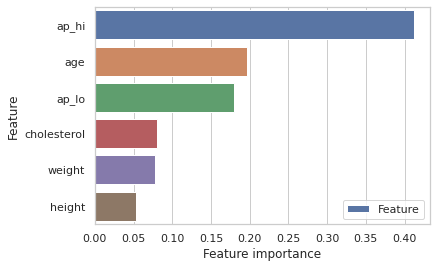

In [31]:
feat_imp = pd.Series(clf.feature_importances_, index = list(X_train)).sort_values(ascending = False)
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = feat_imp, y = feat_imp.index, label = 'Feature')
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.legend()
feat_imp

Text(0.5, 1.0, 'Confusion Matrix')

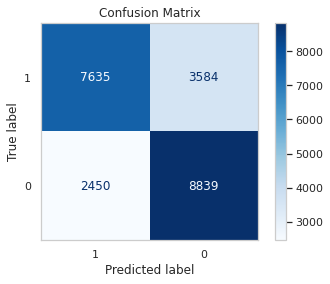

In [32]:
#confusion matrix
from sklearn import metrics
#fig, ax = plt.subplots(1,1)
#ax.grid(False)
# DEPRECATED: metrics.plot_confusion_matrix(clf, X_test, y_test, labels = (1,0),  normalize = None)
disp = metrics.ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, labels = (1,0), normalize = None, cmap='Blues')
disp.ax_.grid(False)
disp.ax_.set_title('Confusion Matrix')

## ROC Curve

Text(0.5, 1.0, 'ROC Curve')

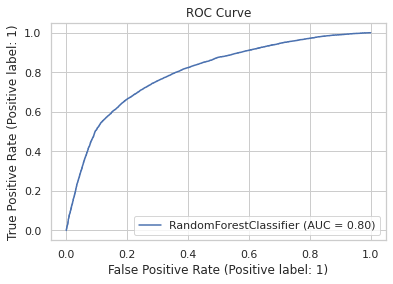

In [34]:
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
#DEPRECATED:plot_roc_curve(clf, X_test, y_test)
disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
disp.ax_.grid(True)
disp.ax_.set_title("ROC Curve")
#RocCurveDisplay.from_predictions(y_test,y_pred)


## Precision-Recall Curve

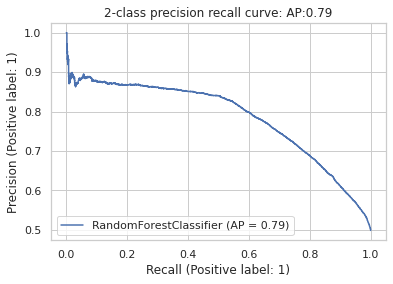

In [36]:
from sklearn.metrics import precision_recall_curve, average_precision_score
#from sklearn.metrics import plot_precision_recall_curve

y_score = clf.predict_proba(X_test)
average_precision = average_precision_score(y_test, y_score[:,1])

# DEPTRECATED: disp = plot_precision_recall_curve(clf, X_test, y_test)
disp = metrics.PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)

disp.ax_.set_title('2-class precision recall curve: ' 'AP:{0:0.2f}'.format(average_precision))
disp.ax_.grid(True)

In [37]:
#accuracy
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7319175404300693

In [38]:
clf.predict(X_test.iloc[0:5,:])

array([1, 0, 1, 0, 1])

In [39]:
y_test.iloc[0:5].values.ravel()

array([1, 0, 1, 0, 1])